In [172]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

In [96]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [2]:
with open('lotto.xls','r',encoding='EUC-KR') as file:
    html_content = file.read()

In [3]:
type(html_content)

str

In [4]:
soup  = BeautifulSoup(html_content,'html.parser')
type(soup)

bs4.BeautifulSoup

In [6]:
# str(soup) DOM객체를 순수 HTML문자열로 변환
html_str = str(soup)
# pd.read_html : html문자열 중에 모든 table 요소를 찾아 데이터 프레임으로 가져와 리스트에 넣어준다.  
tables = pd.read_html(str(soup))
print(len(tables))
# for table in tables :
#     display(table)

2


In [7]:
df = tables[1].iloc[2:]
df.columns = tables[1].iloc[1]
df.to_excel('lotto.xlsx', index=False)

In [8]:
df.shape

(1113, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 2 to 1114
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      1113 non-null   object
 1   회차      1113 non-null   object
 2   추첨일     1113 non-null   object
 3   당첨자수    1113 non-null   object
 4   당첨금액    1113 non-null   object
 5   당첨자수    1113 non-null   object
 6   당첨금액    1113 non-null   object
 7   당첨자수    1113 non-null   object
 8   당첨금액    1113 non-null   object
 9   당첨자수    1113 non-null   object
 10  당첨금액    1113 non-null   object
 11  당첨자수    1113 non-null   object
 12  당첨금액    1113 non-null   object
 13  1       1113 non-null   object
 14  2       1113 non-null   object
 15  3       1113 non-null   object
 16  4       1113 non-null   object
 17  5       1113 non-null   object
 18  6       1113 non-null   object
 19  보너스     1113 non-null   object
dtypes: object(20)
memory usage: 174.0+ KB


In [10]:
df.describe()

1,년도,회차,추첨일,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2,3,4,5,6,보너스
count,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
unique,23,1113,1113,28,1100,108,1112,864,1112,1108,393,1113,2,29,35,38,38,35,28,45
top,2022,1113,2024.03.30,7,0원,33,0원,1228,"1,411,027원",62096,"50,000원",2444535,"5,000원",1,7,20,31,34,45,43
freq,53,1,1,130,14,34,2,5,2,2,713,1,1026,154,71,62,59,77,161,35


In [11]:
df.head()

1,년도,회차,추첨일,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2,3,4,5,6,보너스
2,2024,1113,2024.03.30,14,"1,987,426,822원",57,"81,356,654원",2936,"1,579,472원",146997,"50,000원",2444535,"5,000원",11,13,20,21,32,44,8
3,2024,1112,2024.03.23,10,"2,804,455,650원",59,"79,221,912원",3077,"1,519,043원",148163,"50,000원",2461430,"5,000원",16,20,26,36,42,44,24
4,2024,1111,2024.03.16,16,"1,714,662,540원",97,"47,138,490원",5096,"897,260원",171363,"50,000원",2608760,"5,000원",3,13,30,33,43,45,4
5,2024,1110,2024.03.09,16,"1,647,392,719원",118,"37,229,214원",3654,"1,202,258원",173234,"50,000원",2747163,"5,000원",3,7,11,20,22,41,24
6,2024,1109,2024.03.02,17,"1,584,352,875원",84,"53,440,474원",3347,"1,341,202원",180255,"50,000원",2734683,"5,000원",10,12,13,19,33,40,2


In [12]:
df.columns = ['년도', '회차', '추첨일', '1등 당첨자수', '1등 당첨금액', '2등 당첨자수', '2등 당첨금액', '3등 당첨자수', '3등 당첨금액',
       '4등 당첨자수', '4등 당첨금액', '5등 당첨자수', '5등 당첨금액', '1', '2', '3', '4', '5', '6', '보너스']

In [13]:
df.head()

,년도,회차,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
2,2024,1113,2024.03.30,14,"1,987,426,822원",57,"81,356,654원",2936,"1,579,472원",146997,"50,000원",2444535,"5,000원",11,13,20,21,32,44,8
3,2024,1112,2024.03.23,10,"2,804,455,650원",59,"79,221,912원",3077,"1,519,043원",148163,"50,000원",2461430,"5,000원",16,20,26,36,42,44,24
4,2024,1111,2024.03.16,16,"1,714,662,540원",97,"47,138,490원",5096,"897,260원",171363,"50,000원",2608760,"5,000원",3,13,30,33,43,45,4
5,2024,1110,2024.03.09,16,"1,647,392,719원",118,"37,229,214원",3654,"1,202,258원",173234,"50,000원",2747163,"5,000원",3,7,11,20,22,41,24
6,2024,1109,2024.03.02,17,"1,584,352,875원",84,"53,440,474원",3347,"1,341,202원",180255,"50,000원",2734683,"5,000원",10,12,13,19,33,40,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 2 to 1114
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년도       1113 non-null   object
 1   회차       1113 non-null   object
 2   추첨일      1113 non-null   object
 3   1등 당첨자수  1113 non-null   object
 4   1등 당첨금액  1113 non-null   object
 5   2등 당첨자수  1113 non-null   object
 6   2등 당첨금액  1113 non-null   object
 7   3등 당첨자수  1113 non-null   object
 8   3등 당첨금액  1113 non-null   object
 9   4등 당첨자수  1113 non-null   object
 10  4등 당첨금액  1113 non-null   object
 11  5등 당첨자수  1113 non-null   object
 12  5등 당첨금액  1113 non-null   object
 13  1        1113 non-null   object
 14  2        1113 non-null   object
 15  3        1113 non-null   object
 16  4        1113 non-null   object
 17  5        1113 non-null   object
 18  6        1113 non-null   object
 19  보너스      1113 non-null   object
dtypes: object(20)
memory usage: 174.0+ KB


In [25]:
df.loc[ : , '추첨일'] = pd.to_datetime(df['추첨일'])
df['추첨일'] = pd.to_datetime(df['추첨일'])

C:\Users\kh502\AppData\Local\Temp\ipykernel_1036\1806425754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['추첨일'] = pd.to_datetime(df['추첨일'])


In [27]:
df.dtypes

년도                 object
회차                 object
추첨일        datetime64[ns]
1등 당첨자수            object
1등 당첨금액            object
2등 당첨자수            object
2등 당첨금액            object
3등 당첨자수            object
3등 당첨금액            object
4등 당첨자수            object
4등 당첨금액            object
5등 당첨자수            object
5등 당첨금액            object
1                  object
2                  object
3                  object
4                  object
5                  object
6                  object
보너스                object
dtype: object

In [ ]:
# df.columns.difference(['년도','회차'])

In [28]:
for col in df.columns.difference(['년도','회차','추첨일']):
#     if '당첨' in col :
#     print(col)
    df[col] = df[col].apply(lambda x : pd.to_numeric(re.sub(r'[원,]','',str(x))))

C:\Users\kh502\AppData\Local\Temp\ipykernel_1036\1599765629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x : pd.to_numeric(re.sub(r'[원,]','',str(x))))
C:\Users\kh502\AppData\Local\Temp\ipykernel_1036\1599765629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x : pd.to_numeric(re.sub(r'[원,]','',str(x))))
C:\Users\kh502\AppData\Local\Temp\ipykernel_1036\1599765629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [29]:
df.dtypes

년도                 object
회차                 object
추첨일        datetime64[ns]
1등 당첨자수             int64
1등 당첨금액             int64
2등 당첨자수             int64
2등 당첨금액             int64
3등 당첨자수             int64
3등 당첨금액             int64
4등 당첨자수             int64
4등 당첨금액             int64
5등 당첨자수             int64
5등 당첨금액             int64
1                   int64
2                   int64
3                   int64
4                   int64
5                   int64
6                   int64
보너스                 int64
dtype: object

In [30]:
df.head()

,년도,회차,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
2,2024,1113,2024-03-30,14,1987426822,57,81356654,2936,1579472,146997,50000,2444535,5000,11,13,20,21,32,44,8
3,2024,1112,2024-03-23,10,2804455650,59,79221912,3077,1519043,148163,50000,2461430,5000,16,20,26,36,42,44,24
4,2024,1111,2024-03-16,16,1714662540,97,47138490,5096,897260,171363,50000,2608760,5000,3,13,30,33,43,45,4
5,2024,1110,2024-03-09,16,1647392719,118,37229214,3654,1202258,173234,50000,2747163,5000,3,7,11,20,22,41,24
6,2024,1109,2024-03-02,17,1584352875,84,53440474,3347,1341202,180255,50000,2734683,5000,10,12,13,19,33,40,2


In [31]:
df.describe()

,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
count,1113,1113.000000,1.113000e+03,1113.000000,1.113000e+03,1113.000000,1.113000e+03,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,2013-08-03 00:00:00,7.816712,2.687569e+09,47.436658,6.363660e+07,1795.089847,1.591782e+06,88019.823899,57603.267745,1.442125e+06,5390.835580,6.715184,13.117700,20.005391,26.296496,32.893082,39.569632,22.453729
min,2002-12-07 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,28.000000,6.276340e+05,2537.000000,27300.000000,4.015500e+04,5000.000000,1.000000,2.000000,3.000000,5.000000,9.000000,18.000000,1.000000
25%,2008-04-05 00:00:00,5.000000,1.558378e+09,33.000000,4.898913e+07,1284.000000,1.352809e+06,63699.000000,50000.000000,1.053545e+06,5000.000000,3.000000,8.000000,14.000000,21.000000,28.000000,37.000000,11.000000
50%,2013-08-03 00:00:00,7.000000,2.077280e+09,43.000000,5.719589e+07,1626.000000,1.480560e+06,78522.000000,50000.000000,1.301184e+06,5000.000000,5.000000,12.000000,19.000000,27.000000,34.000000,41.000000,23.000000
75%,2018-12-01 00:00:00,10.000000,3.051106e+09,59.000000,6.707829e+07,2230.000000,1.606882e+06,108450.000000,56807.000000,1.770017e+06,5000.000000,10.000000,18.000000,26.000000,32.000000,38.000000,44.000000,34.000000
max,2024-03-30 00:00:00,50.000000,4.072296e+10,664.000000,7.694565e+08,11247.000000,9.307100e+06,703234.000000,260000.000000,3.410846e+06,10000.000000,35.000000,37.000000,40.000000,43.000000,44.000000,45.000000,45.000000
std,NaN,4.417978,2.441747e+09,27.747023,3.755562e+07,746.431335,6.530126e+05,36717.766239,20636.925876,5.156858e+05,1342.775273,5.333712,6.875013,7.432185,7.530762,6.832416,5.257305,13.229908


In [32]:
df.describe().style.format('{:.2f}')

,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
count,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00
mean,.2f,7.82,2687568924.45,47.44,63636596.10,1795.09,1591782.16,88019.82,57603.27,1442125.04,5390.84,6.72,13.12,20.01,26.30,32.89,39.57,22.45
min,.2f,0.00,0.00,0.00,0.00,28.00,627634.00,2537.00,27300.00,40155.00,5000.00,1.00,2.00,3.00,5.00,9.00,18.00,1.00
25%,.2f,5.00,1558378334.00,33.00,48989132.00,1284.00,1352809.00,63699.00,50000.00,1053545.00,5000.00,3.00,8.00,14.00,21.00,28.00,37.00,11.00
50%,.2f,7.00,2077279594.00,43.00,57195890.00,1626.00,1480560.00,78522.00,50000.00,1301184.00,5000.00,5.00,12.00,19.00,27.00,34.00,41.00,23.00
75%,.2f,10.00,3051105610.00,59.00,67078288.00,2230.00,1606882.00,108450.00,56807.00,1770017.00,5000.00,10.00,18.00,26.00,32.00,38.00,44.00,34.00
max,.2f,50.00,40722959400.00,664.00,769456500.00,11247.00,9307100.00,703234.00,260000.00,3410846.00,10000.00,35.00,37.00,40.00,43.00,44.00,45.00,45.00
std,nan,4.42,2441747295.93,27.75,37555620.84,746.43,653012.58,36717.77,20636.93,515685.75,1342.78,5.33,6.88,7.43,7.53,6.83,5.26,13.23


<Axes: ylabel='Frequency'>

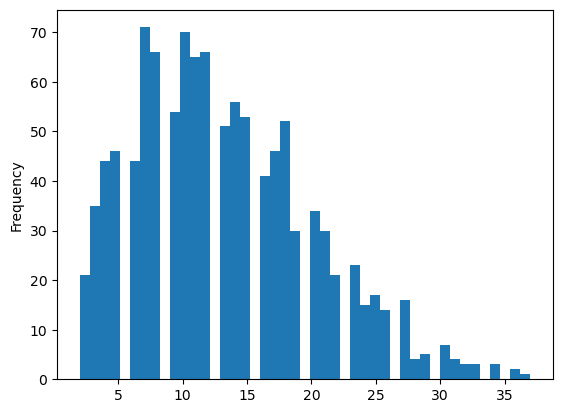

In [38]:
df['2'].plot.hist(bins=45)

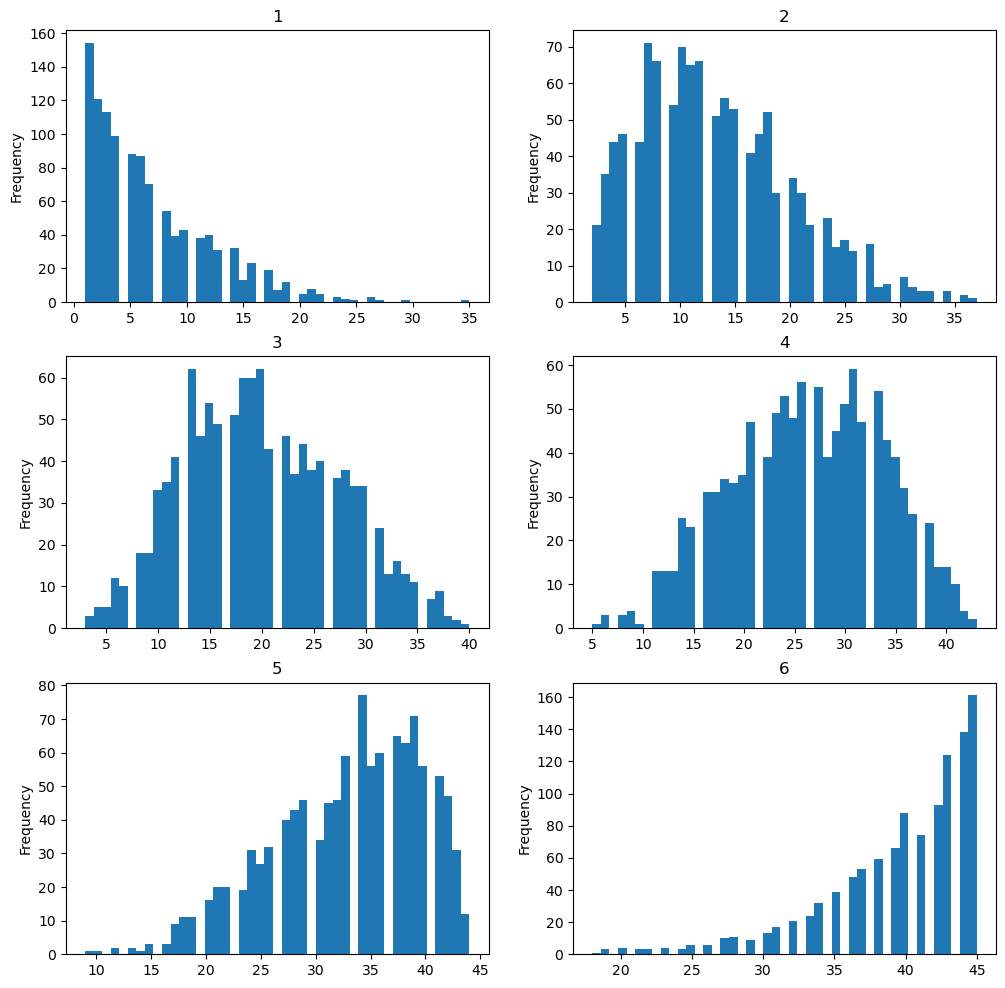

In [86]:
fig, axs = plt.subplots(3,2,figsize=(12,12))
df['1'].plot.hist(ax=axs[0,0],title='1',bins=45)
df['2'].plot.hist(ax=axs[0,1],title='2',bins=45)
df['3'].plot.hist(ax=axs[1,0],title='3',bins=45)
df['4'].plot.hist(ax=axs[1,1],title='4',bins=45)
df['5'].plot.hist(ax=axs[2,0],title='5',bins=45)
df['6'].plot.hist(ax=axs[2,1],title='6',bins=45)
plt.show()

<Axes: xlabel='년도'>

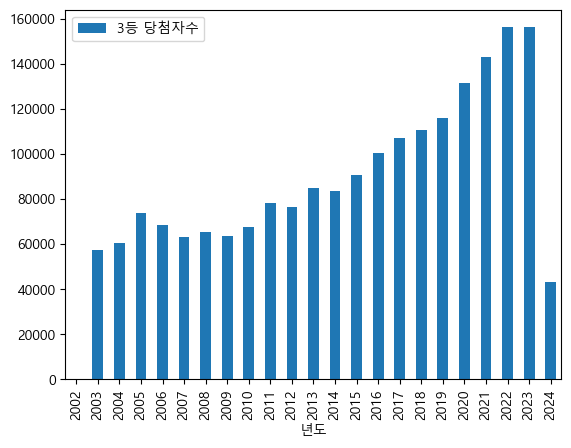

In [145]:
df.groupby('년도')['1등 당첨자수'].sum().to_frame().reset_index().plot.bar('년도','1등 당첨자수')

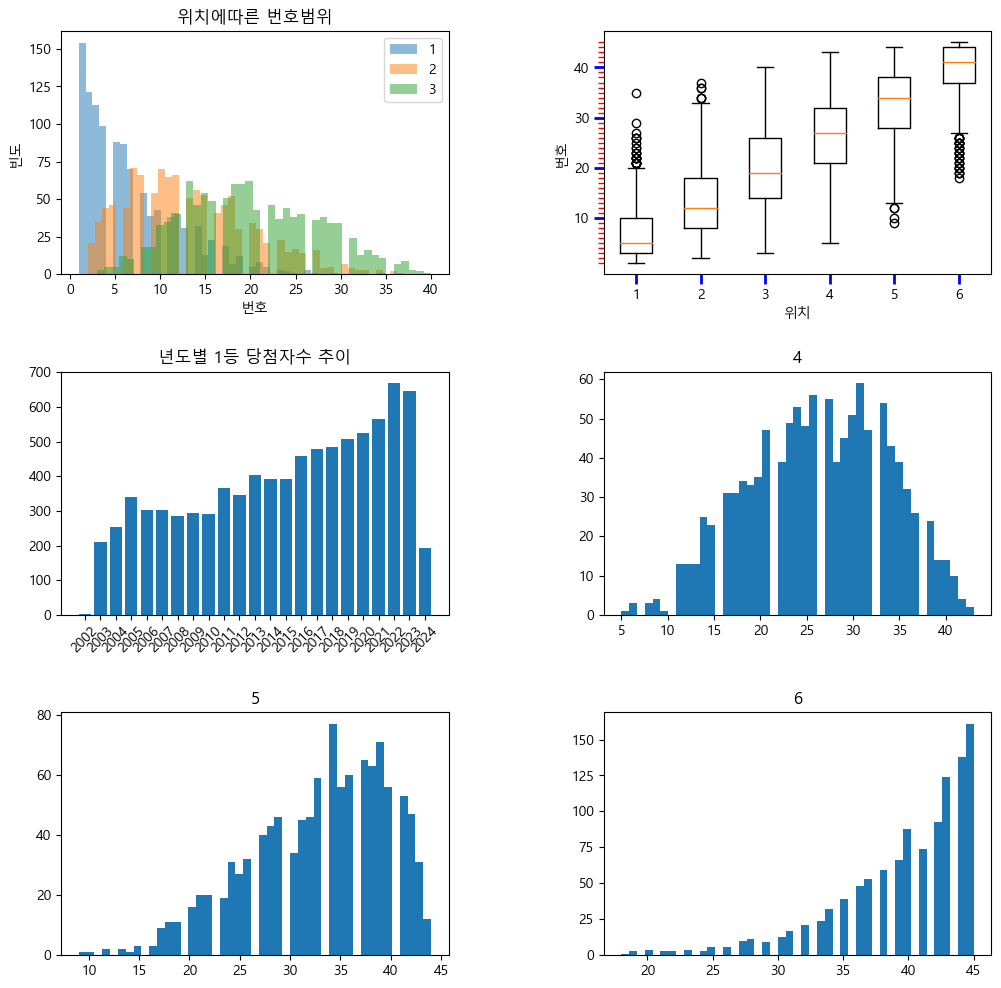

In [161]:
fig, axs = plt.subplots(3,2,figsize=(12,12))
axs[0,0].hist(df['1'],bins=45, alpha=0.5, label=1)
axs[0,0].hist(df['2'],bins=45, alpha=0.5, label=2)
axs[0,0].hist(df['3'],bins=45, alpha=0.5, label=3)
axs[0,0].legend() #범례표시
axs[0,0].set_title('1')
axs[0,0].set_xlabel('번호')
axs[0,0].set_ylabel('빈도')

# axs[0,1].boxplot([df['1'],df['2'],df['3'],df['4'],df['5'],df['6']], labels=['1','2','3','4','5','6'])
axs[0,1].boxplot(df.iloc[ : , -7:-1 ], labels=['1','2','3','4','5','6'])
axs[0,0].set_title('위치에따른 번호범위')
axs[0,1].set_xlabel('위치')
axs[0,1].set_ylabel('번호')
axs[0,1].set_xticks([1,2,3,4,5,6])
axs[0,1].set_yticks([10,20,30,40]) #y축 주눈금
axs[0,1].set_yticks(np.arange(1,45+1), minor=True) #y축 부눈금
axs[0,1].tick_params(which='major', length=7, width=2, color='blue') # 주눈금 스타일
axs[0,1].tick_params(which='minor', length=4, width=1, color='red')  # 부눈금 스타일



data = df.groupby('년도')['1등 당첨자수'].sum().reset_index()
axs[1,0].bar(data['년도'],data['1등 당첨자수'])
axs[1,0].set_title('년도별 1등 당첨자수 추이')
axs[1,0].tick_params(axis='x', rotation=45) # x축 라벨 45도 각도로 표시

axs[1,1].hist(df['4'],bins=45)
axs[2,0].hist(df['5'],bins=45)
axs[2,1].hist(df['6'],bins=45)

axs[1,1].set_title('4')
axs[2,0].set_title('5')
axs[2,1].set_title('6')

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

In [177]:
[df[str(i)].value_counts(normalize=True)*100 for i in range(1,6+1)]

[1
 1     13.836478
 2     10.871518
 3     10.152740
 4      8.894879
 5      7.906559
 6      7.816712
 7      6.289308
 8      4.851752
 10     3.863432
 12     3.593890
 9      3.504043
 11     3.414196
 14     2.875112
 13     2.785265
 16     2.066487
 17     1.707098
 15     1.168014
 19     1.078167
 21     0.718778
 18     0.628931
 20     0.449236
 22     0.449236
 23     0.269542
 26     0.269542
 24     0.179695
 27     0.089847
 29     0.089847
 25     0.089847
 35     0.089847
 Name: proportion, dtype: float64,
 2
 7     6.379155
 10    6.289308
 12    5.929919
 8     5.929919
 11    5.840072
 14    5.031447
 9     4.851752
 15    4.761905
 18    4.672058
 13    4.582210
 5     4.132974
 17    4.132974
 4     3.953279
 6     3.953279
 16    3.683738
 3     3.144654
 20    3.054807
 19    2.695418
 21    2.695418
 23    2.066487
 2     1.886792
 22    1.886792
 25    1.527403
 27    1.437556
 24    1.347709
 26    1.257862
 30    0.628931
 29    0.449236
 31    0.359389
 2

In [202]:
[ np.random.choice([1,2,3],p=[0.7,0.2,0.1]) for i in range(1,10+1) ]

[1, 1, 1, 2, 2, 1, 1, 1, 1, 1]